In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.pylab import rcParams
from datetime import timedelta 
from datetime import datetime 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
bd_cov = pd.read_excel('/content/drive/My Drive/BDTS.xlsx')

In [ ]:
bd_cov.head()

,date,Confirmed,Recovered,Death,D_recovered,D_death,D_confirm,c_test,positive_rate
0,2020-01-22,0,0,0,0,0,0,0.0,0.0
1,2020-01-23,0,0,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0,0,0.0,0.0
4,2020-01-26,0,0,0,0,0,0,0.0,0.0


In [ ]:
bd_cov['date'] = pd.to_datetime(bd_cov['date'],format='%y-%m-%d')

In [ ]:
bd_cov.head()

,date,Confirmed,Recovered,Death,D_recovered,D_death,D_confirm,c_test,positive_rate
0,2020-01-22,0,0,0,0,0,0,0.0,0.0
1,2020-01-23,0,0,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0,0,0.0,0.0
4,2020-01-26,0,0,0,0,0,0,0.0,0.0


In [ ]:
bd_cov.set_index('date', inplace=True)

In [ ]:
bd_cov = bd_cov['2020-03-04': '2020-08-28']

In [ ]:
bd_cov.isnull().sum()

Confirmed        0
Recovered        0
Death            0
D_recovered      0
D_death          0
D_confirm        0
c_test           0
positive_rate    0
dtype: int64

In [ ]:
datewise = bd_cov

In [ ]:
print("Total number of confirmed cases in Bangladesh",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases in Bangladesh",datewise["Recovered"].iloc[-1])
print("Total number of confirmed cases in Bangladesh",datewise["Death"].iloc[-1])
print("Total number of Recovered cases in Bangladesh",datewise["Recovered"].iloc[-1])
print("Total number of Active cases in Bangladesh",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Death"].iloc[-1]))
print("Total number of Closed cases in Bangladesh",(datewise["Recovered"].iloc[-1]+datewise["Death"].iloc[-1]))

Total number of confirmed cases in Bangladesh 306794
Total number of Recovered cases in Bangladesh 196836
Total number of confirmed cases in Bangladesh 4174
Total number of Recovered cases in Bangladesh 196836
Total number of Active cases in Bangladesh 105784
Total number of Closed cases in Bangladesh 201010


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

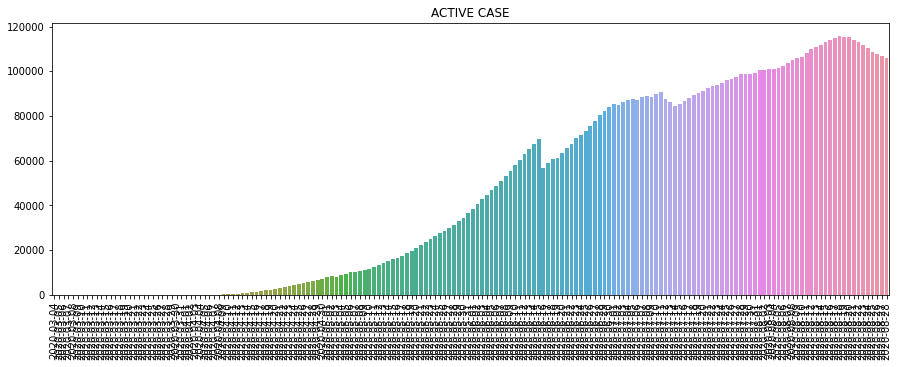

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date , y = (datewise["Confirmed"]-datewise["Recovered"]-datewise["Death"]))
plt.title("ACTIVE CASE")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

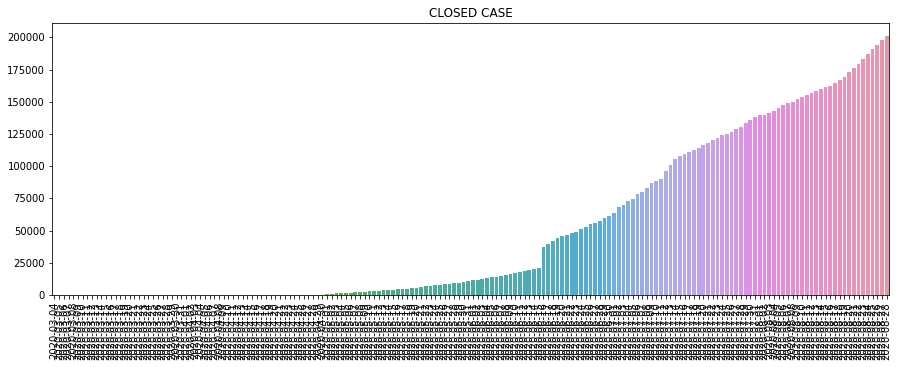

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date , y = (datewise["Recovered"]+datewise["Death"]))
plt.title("CLOSED CASE")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of Different ')

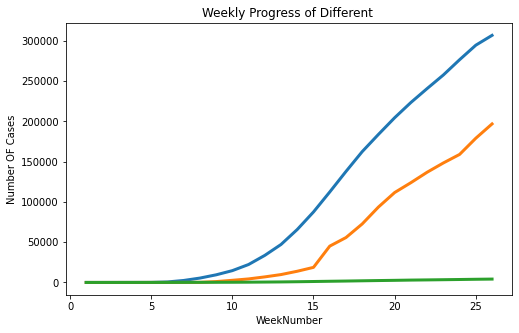

In [ ]:
# analysis of week by week 

datewise["weekofyear"] = datewise.index.weekofyear
week_num =[]
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w=1
for i in list(datewise["weekofyear"].unique()):
  weekwise_confirmed.append(datewise[datewise["weekofyear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["weekofyear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["weekofyear"]==i]["Death"].iloc[-1])
  week_num.append(w)
  w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number OF Cases")
plt.title("Weekly Progress of Different ")


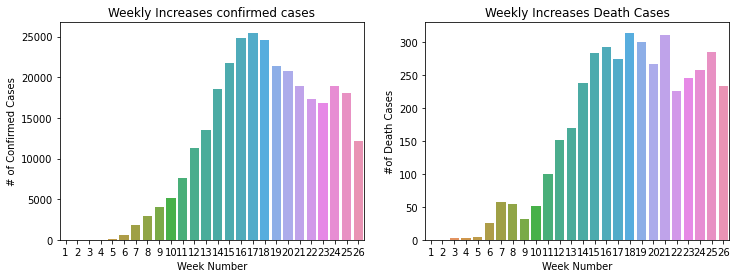

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("# of Confirmed Cases")
ax2.set_ylabel("#of Death Cases")

ax1.set_title("Weekly Increases confirmed cases")
ax2.set_title("Weekly Increases Death Cases")
plt.show()

In [ ]:
print("Average Increases in number of Confirmed cases Every date:", np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print("Average Increases in number of Recoverd cases Every date:", np.round(datewise['Recovered'].diff().fillna(0).mean()))
print("Average Increases in number of Death cases Every date:", np.round(datewise['Death'].diff().fillna(0).mean()))

Average Increases in number of Confirmed cases Every date: 1724.0
Average Increases in number of Recoverd cases Every date: 1106.0
Average Increases in number of Death cases Every date: 23.0


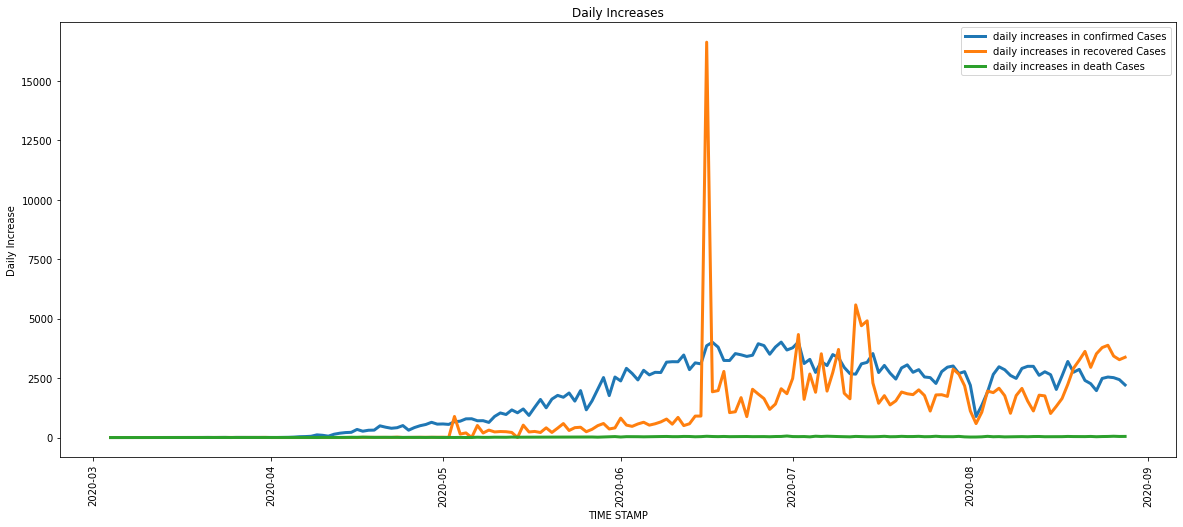

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(datewise['Confirmed'].diff().fillna(0),label="daily increases in confirmed Cases",linewidth=3)
plt.plot(datewise['Recovered'].diff().fillna(0),label="daily increases in recovered Cases",linewidth=3)
plt.plot(datewise['Death'].diff().fillna(0),label="daily increases in death Cases",linewidth=3)

plt.xlabel("TIME STAMP")
plt.ylabel("Daily Increase")
plt.title("Daily Increases")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# here we can include other contries for comparition
covid = pd.read_csv('/content/drive/My Drive/covid_19_data.csv')

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid.drop(["SNo"],1,inplace=True)

In [ ]:
covid["ObservationDate"] = pd.to_datetime(covid['ObservationDate'])

In [ ]:
datewise_global = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [ ]:
datewise_global

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-09-09,27863733.0,18776723.0,903686.0
2020-09-10,28161885.0,18992383.0,909479.0
2020-09-11,28481413.0,19215800.0,915356.0


In [ ]:
print("Total number of confirmed cases around the world",datewise_global["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise_global["Recovered"].iloc[-1])
print("Total number of confirmed cases around the world",datewise_global["Deaths"].iloc[-1])
print("Total number of Recovered cases around the world",datewise_global["Recovered"].iloc[-1])
print("Total number of Active cases around the world",(datewise_global["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Death"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise_global["Recovered"].iloc[-1]+datewise["Death"].iloc[-1]))

Total number of confirmed cases around the world 28902753.0
Total number of Recovered cases around the world 19547423.0
Total number of confirmed cases around the world 922737.0
Total number of Recovered cases around the world 19547423.0
Total number of Active cases around the world 28701743.0
Total number of Closed cases around the world 19551597.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

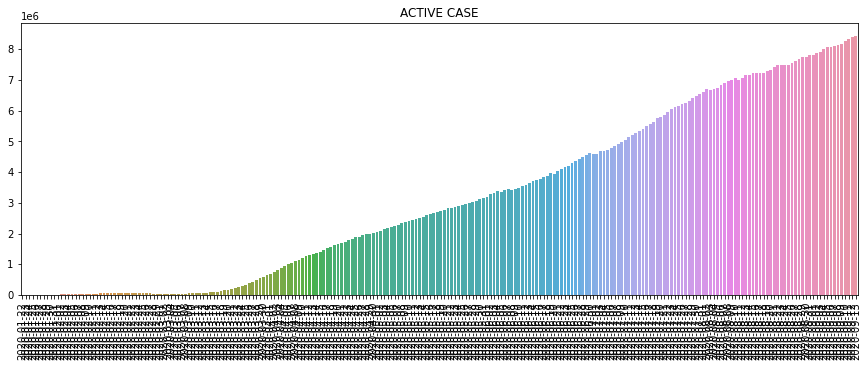

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_global.index.date , y = (datewise_global["Confirmed"]-datewise_global["Recovered"]-datewise_global["Deaths"]))
plt.title("ACTIVE CASE")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

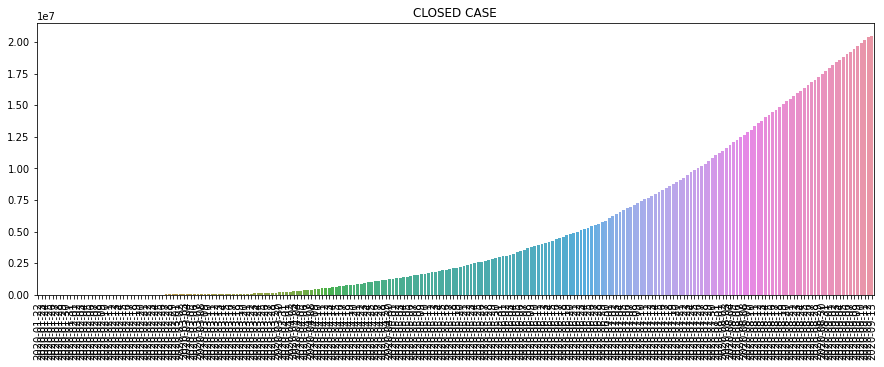

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x= datewise_global.index.date , y = (datewise_global["Recovered"]+datewise_global["Deaths"]))
plt.title("CLOSED CASE")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of Different ')

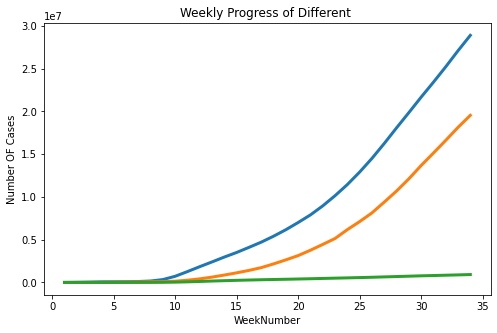

In [ ]:
# analysis of week by week 

datewise_global["weekofyear"] = datewise_global.index.weekofyear
week_num_global =[]
weekwise_confirmed_global = []
weekwise_recovered_global = []
weekwise_deaths_global = []
w=1
for i in list(datewise_global["weekofyear"].unique()):
  weekwise_confirmed_global.append(datewise_global[datewise_global["weekofyear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered_global.append(datewise_global[datewise_global["weekofyear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths_global.append(datewise_global[datewise_global["weekofyear"]==i]["Deaths"].iloc[-1])
  week_num_global.append(w)
  w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num_global,weekwise_confirmed_global,linewidth=3)
plt.plot(week_num_global,weekwise_recovered_global,linewidth=3)
plt.plot(week_num_global,weekwise_deaths_global,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number OF Cases")
plt.title("Weekly Progress of Different ")


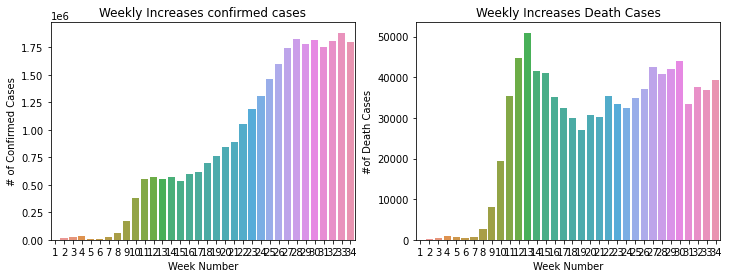

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num_global,y=pd.Series(weekwise_confirmed_global).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_global,y=pd.Series(weekwise_deaths_global).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("# of Confirmed Cases")
ax2.set_ylabel("#of Death Cases")

ax1.set_title("Weekly Increases confirmed cases")
ax2.set_title("Weekly Increases Death Cases")
plt.show()

In [ ]:
print("Average Increases in number of Confirmed cases Every date:", np.round(datewise_global['Confirmed'].diff().fillna(0).mean()))
print("Average Increases in number of Recoverd cases Every date:", np.round(datewise_global['Recovered'].diff().fillna(0).mean()))
print("Average Increases in number of Death cases Every date:", np.round(datewise_global['Deaths'].diff().fillna(0).mean()))

Average Increases in number of Confirmed cases Every date: 122467.0
Average Increases in number of Recoverd cases Every date: 82828.0
Average Increases in number of Death cases Every date: 3910.0


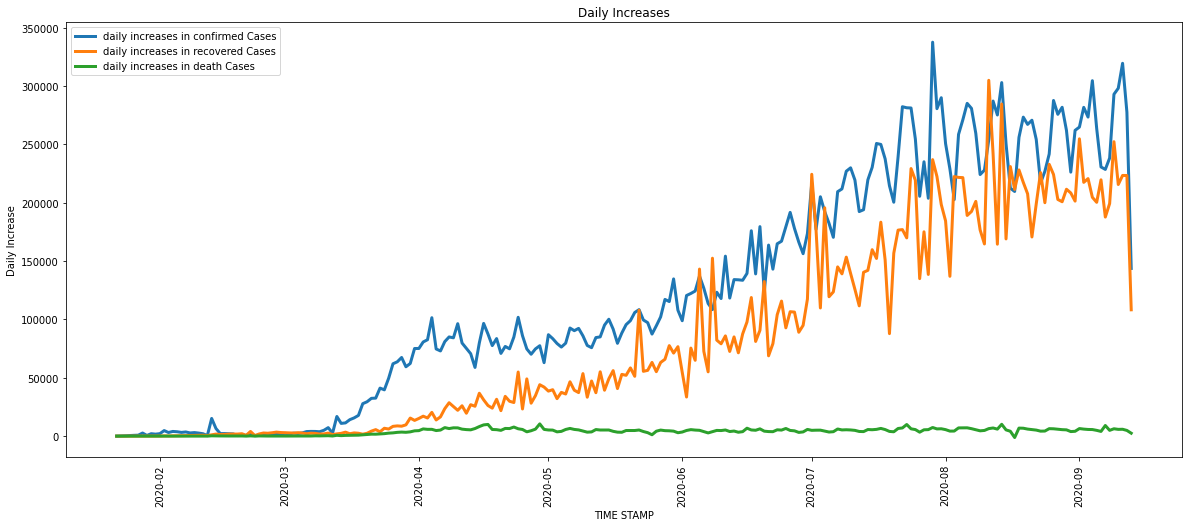

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(datewise_global['Confirmed'].diff().fillna(0),label="daily increases in confirmed Cases",linewidth=3)
plt.plot(datewise_global['Recovered'].diff().fillna(0),label="daily increases in recovered Cases",linewidth=3)
plt.plot(datewise_global['Deaths'].diff().fillna(0),label="daily increases in death Cases",linewidth=3)

plt.xlabel("TIME STAMP")
plt.ylabel("Daily Increase")
plt.title("Daily Increases")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# countrywise analysis
countrywise = covid[covid['ObservationDate']==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending = False )
countrywise["Morality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


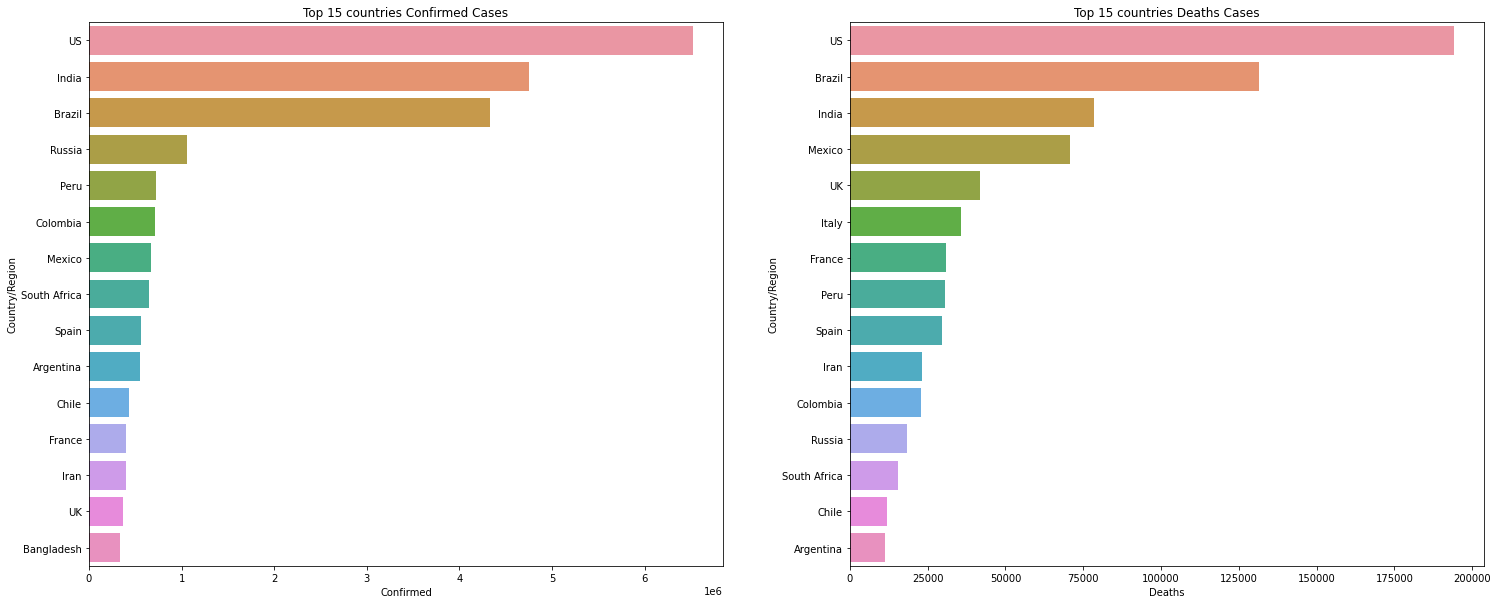

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
top_15recovered = countrywise.sort_values(["Recovered"],ascending=False).head(15)

sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries Confirmed Cases")


sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries Deaths Cases")

plt.show()

In [ ]:
#data analsis of BD

BD_data = covid[covid["Country/Region"]=="Bangladesh"]
datewise_BD = BD_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})


print("Total number of confirmed cases in Bangladesh",datewise_BD["Confirmed"].iloc[-1])
print("Total number of Recovered cases in Bangladesh",datewise_BD["Recovered"].iloc[-1])
print("Total number of confirmed cases in Bangladesh",datewise_BD["Deaths"].iloc[-1])
print("Total number of Recovered cases in Bangladesh",datewise_BD["Recovered"].iloc[-1])
print("Total number of Active cases in Bangladesh",(datewise_BD["Confirmed"].iloc[-1]-datewise_BD["Recovered"].iloc[-1]-datewise_BD["Deaths"].iloc[-1]))
print("Total number of Closed cases in Bangladesh",(datewise_BD["Recovered"].iloc[-1]+datewise_BD["Deaths"].iloc[-1]))

Total number of confirmed cases in Bangladesh 337520.0
Total number of Recovered cases in Bangladesh 240643.0
Total number of confirmed cases in Bangladesh 4733.0
Total number of Recovered cases in Bangladesh 240643.0
Total number of Active cases in Bangladesh 92144.0
Total number of Closed cases in Bangladesh 245376.0


Text(0.5, 1.0, 'Weekly Progress of Different ')

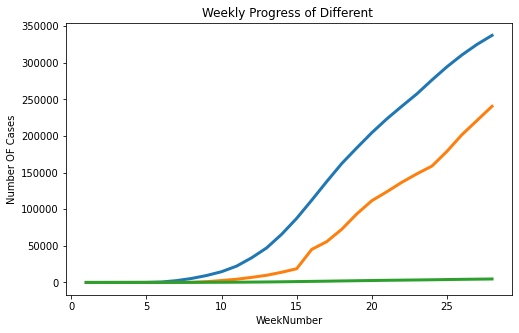

In [ ]:
# analysis of week by week  BD

datewise_BD["weekofyear"] = datewise_BD.index.weekofyear
BD_week_num =[]
BD_weekwise_confirmed = []
BD_weekwise_recovered = []
BD_weekwise_deaths = []
w=1
for i in list(datewise_BD["weekofyear"].unique()):
  BD_weekwise_confirmed.append(datewise_BD[datewise_BD["weekofyear"]==i]["Confirmed"].iloc[-1])
  BD_weekwise_recovered.append(datewise_BD[datewise_BD["weekofyear"]==i]["Recovered"].iloc[-1])
  BD_weekwise_deaths.append(datewise_BD[datewise_BD["weekofyear"]==i]["Deaths"].iloc[-1])
  BD_week_num.append(w)
  w=w+1

plt.figure(figsize=(8,5))
plt.plot(BD_week_num,BD_weekwise_confirmed,linewidth=3)
plt.plot(BD_week_num,BD_weekwise_recovered,linewidth=3)
plt.plot(BD_week_num,BD_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number OF Cases")
plt.title("Weekly Progress of Different ")


In [ ]:
# data analysis for US 

US_data = covid[covid["Country/Region"]=="US"]
datawise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})


print("Total number of confirmed cases in US",datawise_US["Confirmed"].iloc[-1])
print("Total number of Recovered cases in US",datawise_US["Recovered"].iloc[-1])
print("Total number of confirmed cases in US",datawise_US["Deaths"].iloc[-1])
print("Total number of Recovered cases in US",datawise_US["Recovered"].iloc[-1])
print("Total number of Active cases in US",(datawise_US["Confirmed"].iloc[-1]-datawise_US["Recovered"].iloc[-1]-datawise_US["Deaths"].iloc[-1]))
print("Total number of Closed cases in US",(datawise_US["Recovered"].iloc[-1]+datawise_US["Deaths"].iloc[-1]))

Total number of confirmed cases in US 6519573.0
Total number of Recovered cases in US 2451406.0
Total number of confirmed cases in US 194071.0
Total number of Recovered cases in US 2451406.0
Total number of Active cases in US 3874096.0
Total number of Closed cases in US 2645477.0


In [ ]:
# peak and the time it took

max_BD = datewise_BD["Confirmed"].max()
china_data = covid[covid["Country/Region"] == "Mainland China"]
Italy_data = covid[covid["Country/Region"] == "Italy"]
US_data = covid[covid["Country/Region"] == "US"]
Spain_data = covid[covid["Country/Region"] == "Spain"]

datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = Spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

print("It took",datewise_BD[datewise_BD["Confirmed"]>0].shape[0],"days in BD to Reach ",max_BD,"Confirmed cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"] > 0) & (datewise_Italy["Confirmed"]<=max_BD)].shape[0],"days in italy to reach the  num Confirmed cases")
print("It took",datewise_US[(datewise_US["Confirmed"] > 0) & (datewise_US["Confirmed"]<=max_BD)].shape[0],"days in US to reach the  num Confirmed cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"] > 0) & (datewise_Spain["Confirmed"]<=max_BD)].shape[0],"days in  Spain to reach the  num Confirmed cases")
print("It took",datewise_china[(datewise_china["Confirmed"] > 0) & (datewise_china["Confirmed"]<=max_BD)].shape[0],"days in China to reach the  num Confirmed cases")


It took 190 days in BD to Reach  337520.0 Confirmed cases
It took 227 days in italy to reach the  num Confirmed cases
It took 75 days in US to reach the  num Confirmed cases
It took 195 days in  Spain to reach the  num Confirmed cases
It took 236 days in China to reach the  num Confirmed cases


In [ ]:
datewise_BD['2020-03-08': '2020-08-31']

,Confirmed,Recovered,Deaths,weekofyear
ObservationDate,,,,
2020-03-08,3.0,0.0,0.0,10
2020-03-09,3.0,0.0,0.0,11
2020-03-10,3.0,0.0,0.0,11
2020-03-11,3.0,0.0,0.0,11
2020-03-12,3.0,0.0,0.0,11
...,...,...,...,...
2020-08-27,304583.0,193458.0,4127.0,35
2020-08-28,306794.0,196836.0,4174.0,35
2020-08-29,308925.0,198863.0,4206.0,35


In [ ]:
datewise_global["Days Since"] = datewise_global.index-datewise_global.index[0]
datewise_global["Days Since"] = datewise_global["Days Since"].dt.days
train_ml = datewise_global.iloc[:int(datewise_global.shape[0]*0.95)]
valid_ml = datewise_global.iloc[ int(datewise_global.shape[0]*0.95):]
model_scores = [] 

In [ ]:
#data fit
lin_reg = LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)

lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1, 1),np.array(train_ml['Confirmed']).reshape(-1, 1))

svm.fit(np.array(train_ml["Days Since"]).reshape(-1, 1),np.array(train_ml['Confirmed']).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#predictions
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))



In [ ]:
new_date = []
new_predition_lr = []
new_predition_svm =[]
for i in range(1,18):
  new_date.append(datewise_global.index[-1]+timedelta(days=i))
  new_predition_lr.append( lin_reg.predict(np.array(datewise_global["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_predition_svm.append(svm.predict(np.array(datewise_global["Days Since"].max()+i).reshape(-1,1))[0])


pd.set_option("display.float_format",lambda x:'%.f'%x)
model_predicitions = pd.DataFrame(zip(new_date,new_predition_lr,new_predition_svm),columns=["Dates","LR","SVM"])
model_predicitions.head(20)


,Dates,LR,SVM
0,2020-09-14,20848198,15565676
1,2020-09-15,20958506,15812093
2,2020-09-16,21068813,16062704
3,2020-09-17,21179121,16317563
4,2020-09-18,21289429,16576723
5,2020-09-19,21399737,16840238
6,2020-09-20,21510044,17108164
7,2020-09-21,21620352,17380555
8,2020-09-22,21730660,17657467
9,2020-09-23,21840967,17938956


In [ ]:
new_date = []
new_predition_lr = []
new_predition_svm =[]
for i in range(1,18):
  new_date.append(datewise_global.index[-1]+timedelta(days=i))
  new_predition_lr.append( lin_reg.predict(np.array(datewise_global["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_predition_svm.append(svm.predict(np.array(datewise_global["Days Since"].max()+i).reshape(-1,1))[0])


pd.set_option("display.float_format",lambda x:'%.f'%x)
model_predicitions = pd.DataFrame(zip(new_date,new_predition_lr,new_predition_svm),columns=["Dates","LR","SVM"])
model_predicitions.head(20)


,Dates,LR,SVM
0,2020-09-14,20848198,15565676
1,2020-09-15,20958506,15812093
2,2020-09-16,21068813,16062704
3,2020-09-17,21179121,16317563
4,2020-09-18,21289429,16576723
5,2020-09-19,21399737,16840238
6,2020-09-20,21510044,17108164
7,2020-09-21,21620352,17380555
8,2020-09-22,21730660,17657467
9,2020-09-23,21840967,17938956


In [ ]:
datewise_BD["Days Since"] = datewise_BD.index-datewise_BD.index[0]
datewise_BD["Days Since"] = datewise_BD["Days Since"].dt.days
train_ml = datewise_BD.iloc[:int(datewise_BD.shape[0]*0.92)]
valid_ml = datewise_BD.iloc[int(datewise_BD.shape[0]*0.92):]
model_scores = [] 

In [ ]:
#data fit
lin_reg = LinearRegression(normalize=True)
svm=SVR(C=1,degree=2,kernel='rbf',epsilon=0.002)

lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1, 1),np.array(train_ml['Confirmed']).reshape(-1, 1))

svm.fit(np.array(train_ml["Days Since"]).reshape(-1, 1),np.array(train_ml['Confirmed']).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.002, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#predictions
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))


In [ ]:
new_date = []
new_predition_lr = []
new_predition_svm =[]
for i in range(1,18):
  new_date.append(train_ml.index[-1]+timedelta(days=i))
  new_predition_lr.append( lin_reg.predict(np.array(train_ml["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_predition_svm.append(svm.predict(np.array(train_ml["Days Since"].max()+i).reshape(-1,1))[0])

pd.set_option("display.float_format",lambda x:'%.f'%x)
model_predicitions = pd.DataFrame(zip(new_date,new_predition_lr,new_predition_svm,valid_ml["Confirmed"]['	2020-08-29':]),columns=["Dates","LR","SVM","Real_confirmed_data"])
model_predicitions.head(20)


,Dates,LR,SVM,Real_confirmed_data
0,2020-08-29,271822,53835,308925
1,2020-08-30,273791,53834,310822
2,2020-08-31,275760,53833,312996
3,2020-09-01,277729,53833,314946
4,2020-09-02,279698,53832,317528
5,2020-09-03,281666,53831,319686
6,2020-09-04,283635,53830,321615
7,2020-09-05,285604,53829,323565
8,2020-09-06,287573,53828,325157
9,2020-09-07,289542,53827,327359


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Dataset Covid-19.xlsx')

In [ ]:
data1 = pd.read_excel('/content/drive/My Drive/BD_new.xlsx')

In [ ]:
BD = data[data["location"] == "Bangladesh"]

In [ ]:
BD.drop(columns=['location', 'population_density', 'median_age', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
BD['date'] = pd.to_datetime(BD['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1['date'] = pd.to_datetime(BD['date'])

In [ ]:
BD['recovered'] = data1['Daily recovered']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
BD['confirmed_cases'] = data1['daily confirm']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
BD['death'] = data1['Daily death']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
BD.drop(columns=['new_deaths'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
BD.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,positive_rate,recovered,confirmed_cases,death
0,2020-03-04,0,0,0,0,108,0,0,0,0
1,2020-03-05,0,0,0,3,111,0,0,0,0
2,2020-03-06,0,0,0,4,115,0,0,0,0
3,2020-03-07,0,0,0,5,120,0,0,0,0
4,2020-03-08,0,0,0,7,127,0,0,3,0


In [ ]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             178 non-null    datetime64[ns]
 1   total_cases      178 non-null    int64         
 2   new_cases        178 non-null    int64         
 3   total_deaths     178 non-null    int64         
 4   new_tests        178 non-null    int64         
 5   total_tests      178 non-null    int64         
 6   positive_rate    178 non-null    float64       
 7   recovered        178 non-null    int64         
 8   confirmed_cases  178 non-null    int64         
 9   death            178 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 15.3 KB


In [ ]:
BD.isnull().sum()

date               0
total_cases        0
new_cases          0
total_deaths       0
new_tests          0
total_tests        0
positive_rate      0
recovered          0
confirmed_cases    0
death              0
dtype: int64

In [ ]:
BD.corr()

,total_cases,new_cases,total_deaths,new_tests,total_tests,positive_rate,recovered,confirmed_cases,death
total_cases,1,1,1,1,1,1,1,1,1
new_cases,1,1,1,1,1,1,1,1,1
total_deaths,1,1,1,1,1,1,1,1,1
new_tests,1,1,1,1,1,1,1,1,1
total_tests,1,1,1,1,1,1,1,1,1
positive_rate,1,1,1,1,1,1,1,1,1
recovered,1,1,1,1,1,1,1,1,1
confirmed_cases,1,1,1,1,1,1,1,1,1
death,1,1,1,1,1,1,1,1,1


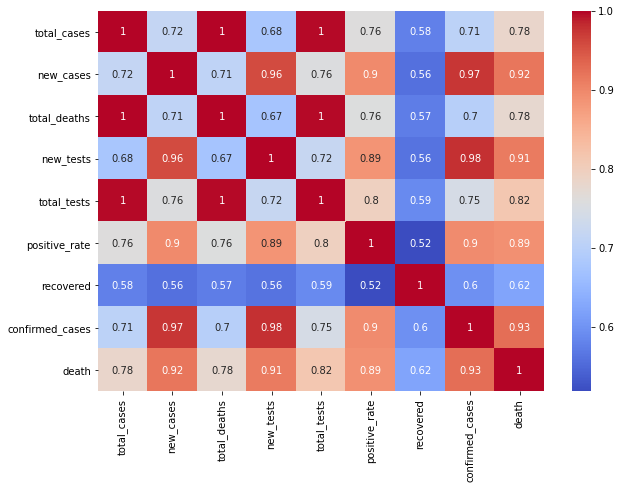

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(BD.corr(),annot=True,cmap='coolwarm')

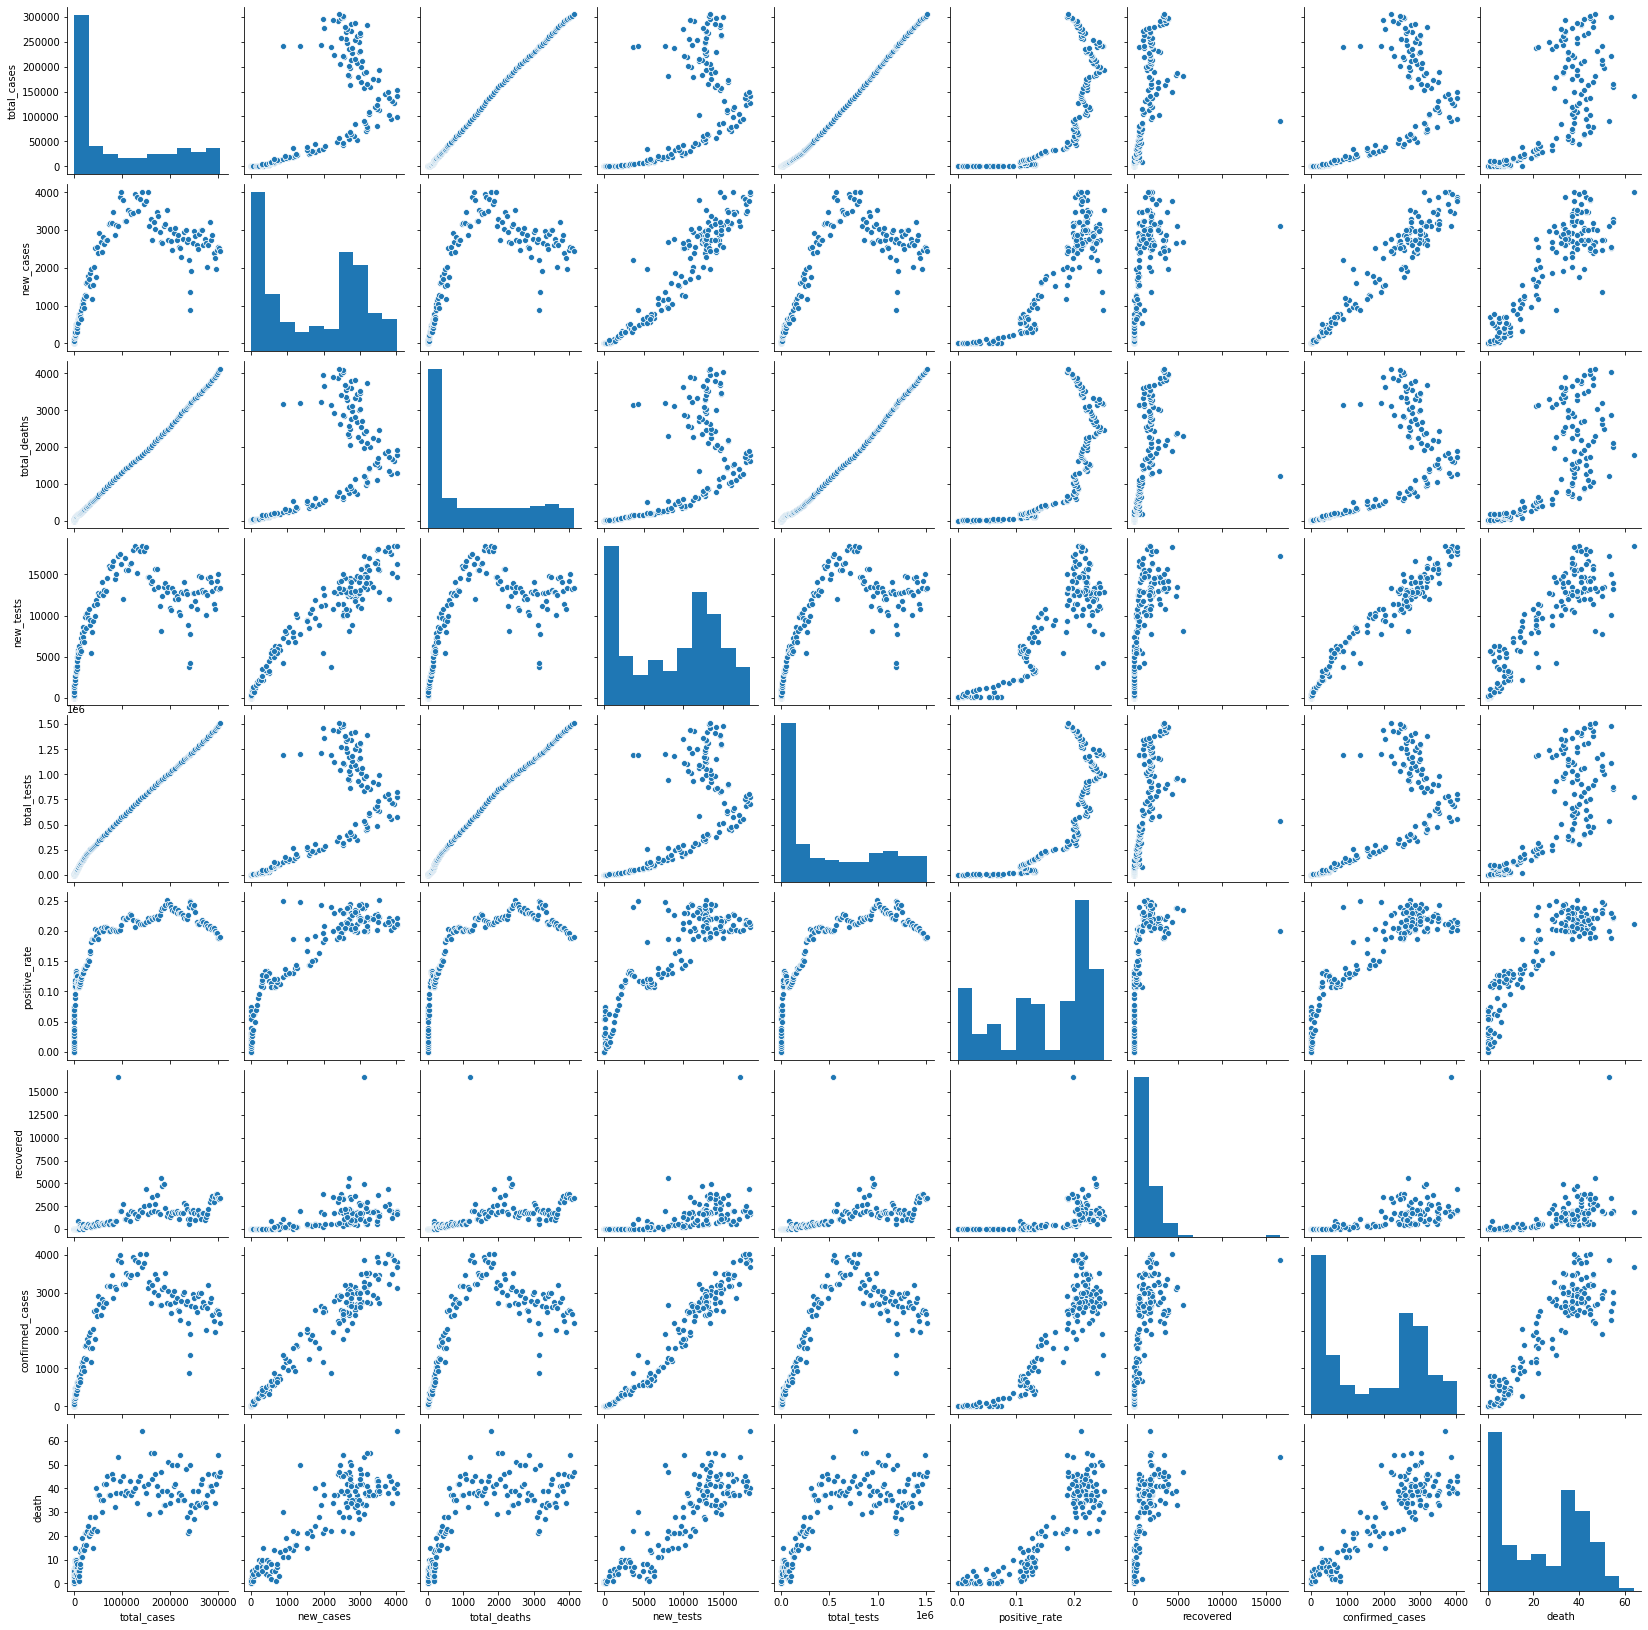

In [ ]:
sns.pairplot(data=BD)

In [ ]:
df = BD.dropna(how='any',axis=0) 

In [ ]:
df

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,positive_rate,recovered,confirmed_cases,death
0,2020-03-04,0,0,0,0,108,0,0,0,0
1,2020-03-05,0,0,0,3,111,0,0,0,0
2,2020-03-06,0,0,0,4,115,0,0,0,0
3,2020-03-07,0,0,0,5,120,0,0,0,0
4,2020-03-08,0,0,0,7,127,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
173,2020-08-24,294598,1973,3941,13382,1456038,0,3784,2485,42
174,2020-08-25,297083,2485,3983,14153,1470191,0,3881,2545,45
175,2020-08-26,299628,2545,4028,15070,1485261,0,3427,2519,54
176,2020-08-27,302147,2519,4082,13261,1498522,0,3275,2436,45


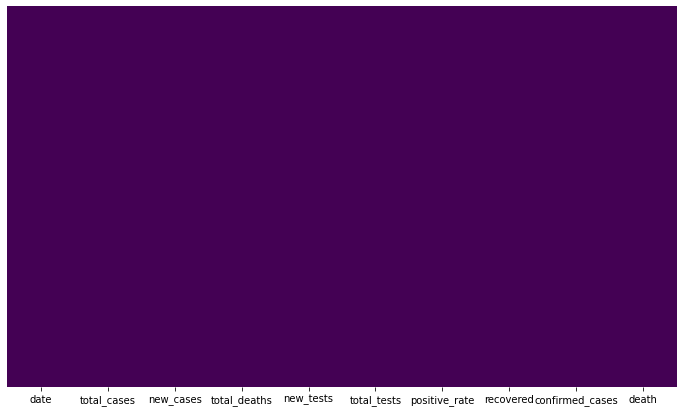

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [ ]:
df['date'] = pd.to_datetime(df['date'],format='%y-%m-%d')

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests,positive_rate,recovered,confirmed_cases,death
date,,,,,,,,,
2020-03-04,0,0,0,0,108,0,0,0,0
2020-03-05,0,0,0,3,111,0,0,0,0
2020-03-06,0,0,0,4,115,0,0,0,0
2020-03-07,0,0,0,5,120,0,0,0,0
2020-03-08,0,0,0,7,127,0,0,3,0


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
confirm = df['confirmed_cases']

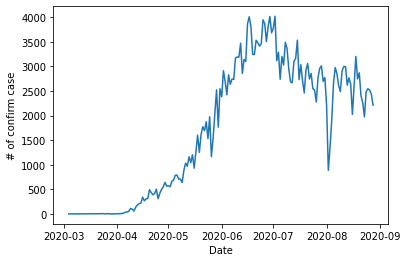

In [ ]:
plt.xlabel("Date")
plt.ylabel("# of confirm case")
plt.plot(confirm)

In [ ]:
confirm = confirm.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

confirm.head(15)

date
2020-03-04    0
2020-03-05    0
2020-03-06    0
2020-03-07    0
2020-03-08    3
2020-03-09    0
2020-03-10    0
2020-03-11    0
2020-03-12    0
2020-03-13    0
2020-03-14    0
2020-03-15    2
2020-03-16    3
2020-03-17    2
2020-03-18    4
Name: confirmed_cases, dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


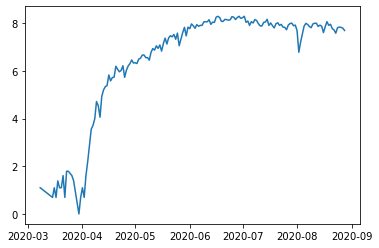

In [ ]:
#Estimating Trend
confirm_inlog = np.log(confirm)
confirm_inlog = confirm_inlog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
plt.plot(confirm_inlog)

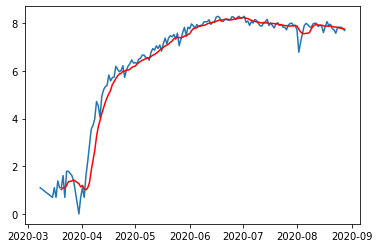

In [ ]:
#MA after log transformation checking the avg after some point it becomes almost stationary
mov_avg = confirm_inlog.rolling(window=7).mean()
mov_std = confirm_inlog.rolling(window=7).std()
plt.plot(confirm_inlog)
plt.plot(mov_avg,color='red')

In [ ]:
# log depend on 
conf_logminusMov_Avg = confirm_inlog-mov_avg
conf_logminusMov_Avg.head(12)


#remove nan val
conf_logminusMov_Avg.dropna(inplace = True)
conf_logminusMov_Avg.head(10)

date
2020-03-20    0
2020-03-21    1
2020-03-22   -0
2020-03-23    1
2020-03-24    0
2020-03-26    0
2020-03-27   -0
2020-03-30   -1
2020-03-31   -0
2020-04-01   -0
Name: confirmed_cases, dtype: float64

In [ ]:
def test_statinarity(ts):
  # det roll stat
  rolmean = ts.rolling(window=7).mean()
  rolstd = ts.rolling(window=7).std()

  orig = plt.plot(ts,color='blue',label = 'Original')
  mean = plt.plot(rolmean,color='red',label = 'Rolling mean')
  std = plt.plot(rolstd,color='black',label = 'Rolling std')
  plt.legend(loc = 'best')
  plt.title('ROL MEAN & ROL STD')
  plt.show(block= False)

  #dickey fuller
  print('Results of Dickey-fuller TEST:')
  dftest= adfuller(ts,autolag='AIC') # AIC
  dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic', 'p-value','#Lags Used','Number of observation used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value
  print(dfoutput)

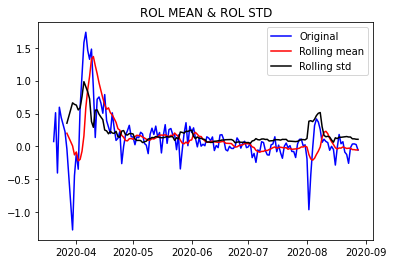

Results of Dickey-fuller TEST:
Test Statistic                -4
p-value                        0
#Lags Used                    14
Number of observation used   144
Critical Value (1%)           -3
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [ ]:
test_statinarity(conf_logminusMov_Avg)

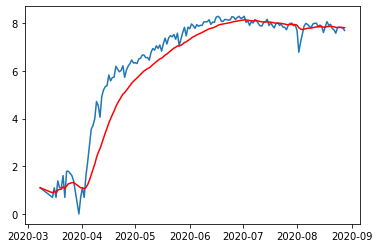

In [ ]:
# p val is less 
exp_weight_avg = confirm_inlog.ewm(halflife=7,min_periods=0,adjust=True).mean()
plt.plot(confirm_inlog)
plt.plot(exp_weight_avg,color='red')


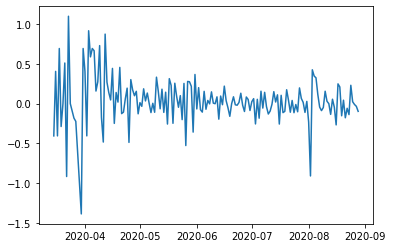

In [ ]:
datasetlogDifShift = confirm_inlog - confirm_inlog.shift()
plt.plot(datasetlogDifShift)

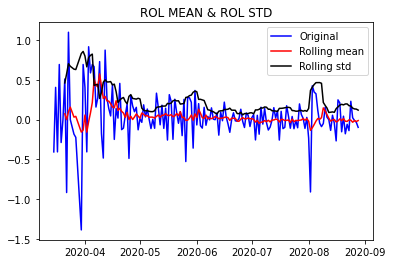

Results of Dickey-fuller TEST:
Test Statistic                -7
p-value                        0
#Lags Used                     2
Number of observation used   161
Critical Value (1%)           -3
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [ ]:
datasetlogDifShift.dropna(inplace = True)
test_statinarity(datasetlogDifShift)

In [ ]:
confirm_inlog.head(20)
pd.to_datetime(confirm_inlog.index,format='%y-%m-%d')

DatetimeIndex(['2020-03-08', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', name='date', length=165, freq=None)

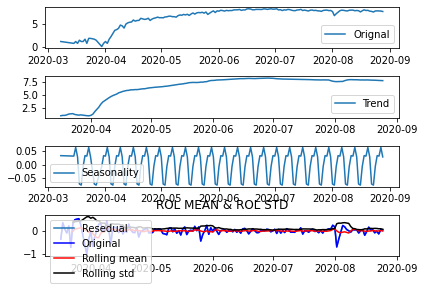

Results of Dickey-fuller TEST:
Test Statistic                -7
p-value                        0
#Lags Used                     9
Number of observation used   149
Critical Value (1%)           -3
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompo = seasonal_decompose(confirm_inlog ,freq=7)

trend = decompo.trend
seasonal = decompo.seasonal
residual = decompo.resid

plt.subplot(411)
plt.plot(confirm_inlog,label = "Orignal")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = "Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = "Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = "Resedual")
plt.legend(loc='best')
plt.tight_layout()

decomposedlogdata = residual
decomposedlogdata.dropna(inplace = True)

decomposedlogdata.dropna(inplace = True)
test_statinarity(decomposedlogdata)

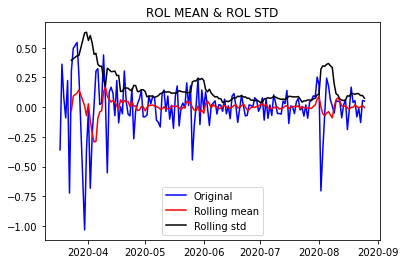

Results of Dickey-fuller TEST:
Test Statistic                -7
p-value                        0
#Lags Used                     9
Number of observation used   149
Critical Value (1%)           -3
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [ ]:
decomposedlogdata = residual
decomposedlogdata.dropna(inplace = True)
test_statinarity(decomposedlogdata) # graph is not stationary

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


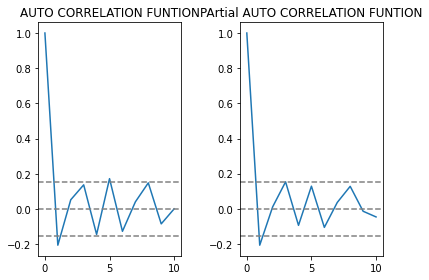

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogDifShift,nlags=10)
lag_pacf = pacf(datasetlogDifShift,nlags=10, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDifShift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDifShift)),linestyle='--',color='gray')
plt.title('AUTO CORRELATION FUNTION')


#plot pACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDifShift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDifShift)),linestyle='--',color='gray')
plt.title('PArtial AUTO CORRELATION FUNTION')

plt.tight_layout()

# to calcula p and q 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting AR model


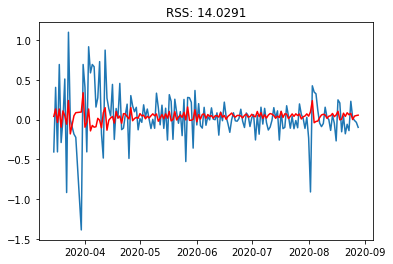

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model

model = ARIMA(confirm_inlog,order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogDifShift)

plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetlogDifShift)**2))
print('plotting AR model')

plotting AR model


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


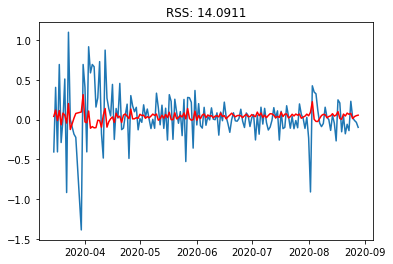

In [ ]:
#MA

model = ARIMA(confirm_inlog,order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogDifShift)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetlogDifShift)**2))
print('plotting AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting AR model


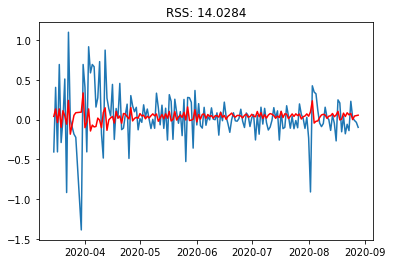

In [ ]:
#ARIMA

model = ARIMA(confirm_inlog,order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDifShift)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetlogDifShift)**2))
print('plotting AR model')

In [ ]:
daily_infected = BD['confirmed_cases']

In [ ]:
daily_death = BD['death']

In [ ]:
daily_recovered = BD['recovered']

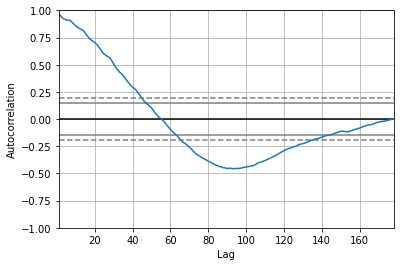

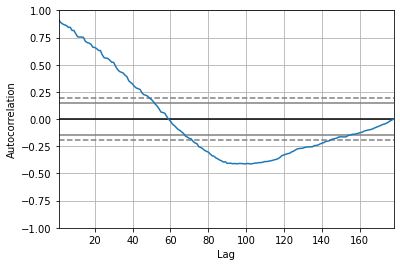

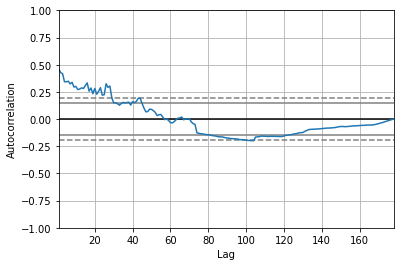

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot 
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


autocorrelation_plot(daily_infected)
pyplot.show()

autocorrelation_plot(daily_death)
pyplot.show()

autocorrelation_plot(daily_recovered)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:      D.confirmed_cases   No. Observations:                  177
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1248.559
Method:                       css-mle   S.D. of innovations            279.670
Date:                Sat, 19 Sep 2020   AIC                           2511.117
Time:                        15:26:31   BIC                           2533.351
Sample:                             1   HQIC                          2520.134
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.3326      9.698      1.375      0.171      -5.675      32.340
ar.L1.D.confirmed_cases    -0.3043      0.074     -4.134      0.000      -0.449      -0.160


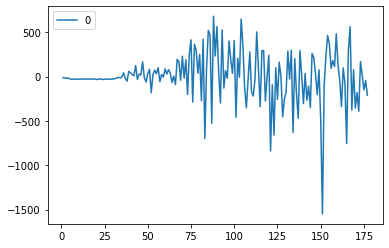

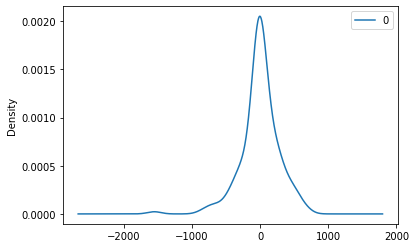

          0
count   177
mean     -0
std     280
min   -1550
25%     -63
50%     -15
75%     124
max     680


In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# fit model
model = ARIMA(daily_infected, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=3815.979712, expected=4014.000000
predicted=4031.989534, expected=3682.000000
predicted=3787.229992, expected=3775.000000
predicted=3817.590654, expected=4019.000000
predicted=4025.228966, expected=3114.000000
predicted=3589.490496, expected=3288.000000
predicted=3496.599509, expected=2738.000000
predicted=3204.793185, expected=3201.000000
predicted=3103.705642, expected=3027.000000
predicted=3178.550612, expected=3489.000000
predicted=3248.510225, expected=3360.000000
predicted=3437.537559, expected=2949.000000
predicted=3112.740471, expected=2686.000000
predicted=2946.325576, expected=2666.000000
predicted=2856.595251, expected=3099.000000
predicted=3057.547459, expected=3163.000000
predicted=3137.406003, expected=3533.000000
predicted=3306.224013, expected=2733.000000
predicted=3013.242860, expected=3034.000000
predicted=2957.662825, expected=2709.000000
predicted=3065.497884, expected=2459.000000
predicted=2657.947622, expected=2928.000000
predicted=2891.805660, expected=

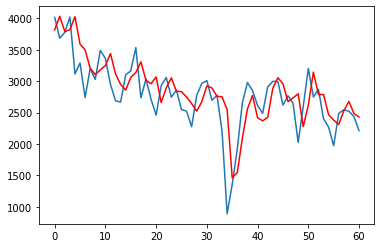

In [ ]:
X = daily_infected.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                D.death   No. Observations:                  177
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -566.229
Method:                       css-mle   S.D. of innovations              5.917
Date:                Sat, 19 Sep 2020   AIC                           1146.459
Time:                        15:26:57   BIC                           1168.692
Sample:                             1   HQIC                          1155.476
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2692      0.151      1.783      0.076      -0.027       0.565
ar.L1.D.death    -0.6908      0.075     -9.213      0.000      -0.838      -0.544
ar.L2.D.death    -0.5538      0.089     

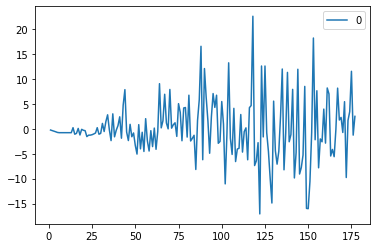

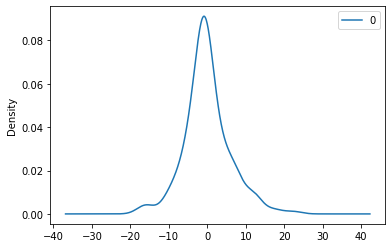

        0
count 177
mean   -0
std     6
min   -17
25%    -3
50%    -1
75%     2
max    23


In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# fit model
model = ARIMA(daily_death, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=40.556880, expected=45.000000
predicted=40.532190, expected=64.000000
predicted=50.287006, expected=41.000000
predicted=47.920728, expected=38.000000
predicted=49.159857, expected=42.000000
predicted=48.547707, expected=29.000000
predicted=38.166840, expected=55.000000
predicted=45.446151, expected=44.000000
predicted=41.169608, expected=55.000000
predicted=48.022014, expected=46.000000
predicted=46.239897, expected=41.000000
predicted=48.265183, expected=37.000000
predicted=44.957447, expected=30.000000
predicted=40.326263, expected=47.000000
predicted=42.962912, expected=39.000000
predicted=41.297681, expected=33.000000
predicted=38.343459, expected=33.000000
predicted=35.098140, expected=39.000000
predicted=39.048025, expected=51.000000
predicted=42.445029, expected=34.000000
predicted=38.375574, expected=37.000000
predicted=38.651886, expected=50.000000
predicted=43.531876, expected=41.000000
predicted=44.264920, expected=42.000000
predicted=41.649417, expected=50.000000


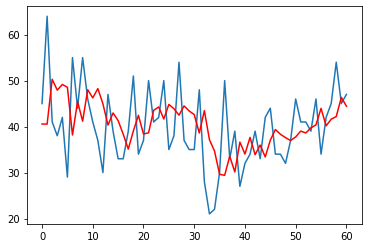

In [ ]:
X = daily_death.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()